# The material presented here is based on Jason Brownlee's tutorials:
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

###### Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

In [3]:
columns = ['sepal-lenght', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [4]:
dataset = pd.read_csv(url, names=columns)

In [5]:
dataset.head(10)

,sepal-lenght,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
dataset.describe()

,sepal-lenght,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

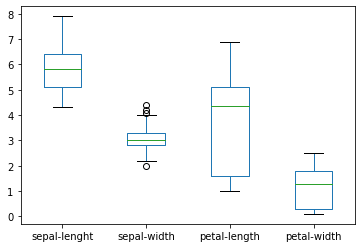

In [8]:
dataset.plot(kind='box')
plt.show()

<AxesSubplot:ylabel='Frequency'>

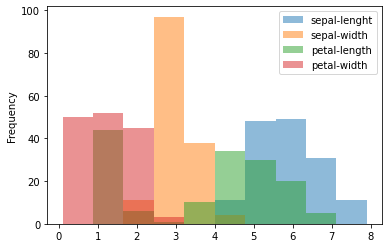

In [9]:
dataset.plot(kind='hist', alpha=0.5)

###### For each data set, call matplotlib.pyplot.hist(x, alpha=n) with x as a data set and n as an integer between 0 and 1 specifying the transparency of each histogram. A lower value of n results in a more transparent histogram.

<AxesSubplot:ylabel='Density'>

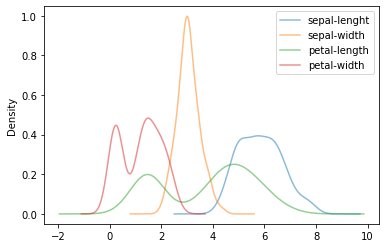

In [10]:
dataset.plot(kind='density', alpha=0.5)

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matpl

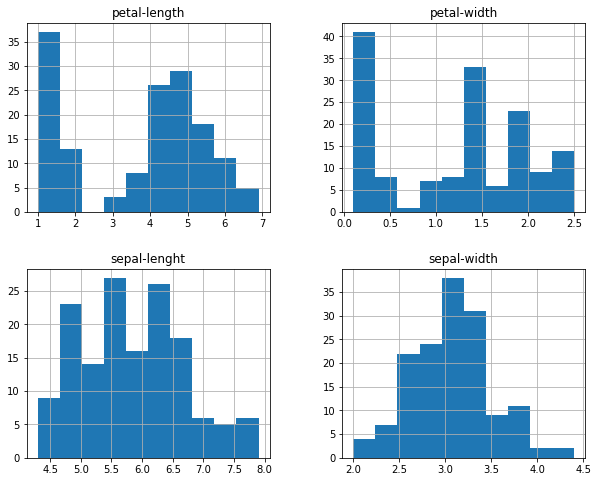

In [11]:
dataset.hist(figsize=(10,8))
plt.show()

In [12]:
from pandas.plotting import scatter_matrix

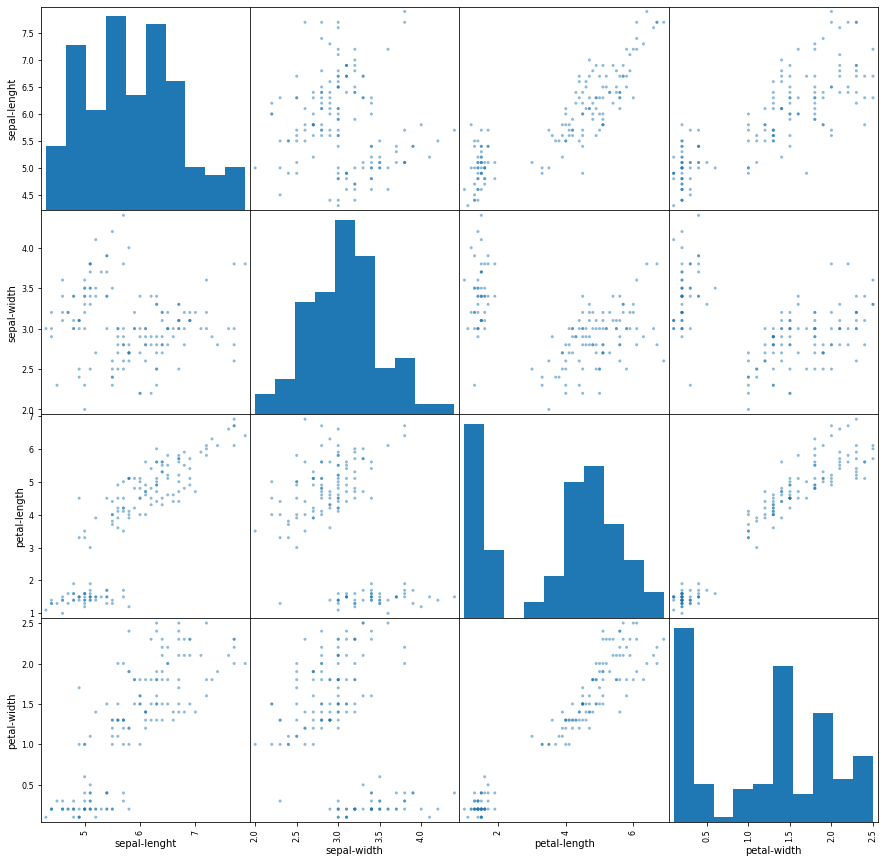

In [13]:
scatter_matrix(dataset, figsize=(15,15))
plt.show()

In [14]:
array = dataset.values

In [15]:
type(array)

numpy.ndarray

In [16]:
type(dataset)

pandas.core.frame.DataFrame

In [17]:
import numpy as np

In [18]:
a = np.array([[1,2,3],[4,5,6]])

In [19]:
a.shape

(2, 3)

In [20]:
array.shape

(150, 5)

In [21]:
array[:,]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [22]:
X = array[:,0:4]
Y = array[:,4]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
X_train.shape

(120, 4)

In [26]:
X_test.shape

(30, 4)

# Logistic Regression

###### Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
kfold = StratifiedKFold(n_splits=10)

###### Stratified K-Folds cross-validator. Provides train/test indices to split data in train/test sets. This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [30]:
cv_result_LR = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
cv_result_LR

array([1.        , 0.91666667, 0.91666667, 1.        , 0.91666667,
       1.        , 1.        , 1.        , 1.        , 0.91666667])

In [33]:
cv_result_LR.mean()

0.9666666666666666

# KNN - K Nearest Neighbors

###### The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier()

In [36]:
cv_result_KNN = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

In [37]:
cv_result_KNN

array([1.        , 0.91666667, 0.91666667, 1.        , 1.        ,
       1.        , 0.91666667, 1.        , 1.        , 0.91666667])

In [38]:
cv_result_KNN.mean()

0.9666666666666666

# SVM - Support Vector Machines

###### Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

In [39]:
from sklearn.svm import SVC

###### C-Support Vector Classification.The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.

In [40]:
model =SVC()

In [41]:
cv_result_SVC = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

In [42]:
cv_result_SVC

array([1.        , 0.91666667, 0.91666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.91666667, 0.91666667])

In [43]:
cv_result_SVC.mean()

0.9666666666666666

In [44]:
model = SVC()

In [45]:
model.fit(X_train, Y_train)

SVC()

In [46]:
predictions = model.predict(X_test)

In [47]:
predictions

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [48]:
np.unique(Y_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
from sklearn.metrics import classification_report

In [52]:
accuracy_score(Y_test, predictions)

0.9666666666666667

In [53]:
confusion_matrix(Y_test, predictions)

array([[14,  0,  0],
       [ 0,  6,  1],
       [ 0,  0,  9]])

In [54]:
print(classification_report(Y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30

